In [1]:
from pylab import *
%matplotlib inline

In [2]:
def rk4_a(ec,p_ini,x,args=0,h=0.00001):
    if (x[1]-x[0]) <= 5.*h:
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:] = sol[i,:] + (h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:] = sol[i,:] + (h/6.)*(k1+2*k2+2*k3+k4)

    return tiempos,sol

In [3]:
def f(x,omega=1):
    return sin(omega*x)

def g(h_de_x,x,args=[]):
    if len(args)==0:
        resultado = exp(-x)*h_de_x(x)
    else:
        resultado = exp(-x)*h_de_x(x,args)
    return resultado

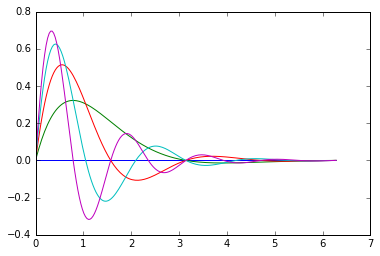

In [4]:
x=linspace(0,2*pi,200)
for i in range(5):
    plot(x,g(f,x,[i]))
show()

In [5]:
def e_mov(r_v,t,fric=0,g=9.8,m=1):
    u = sqrt(r_v[2]**2 + r_v[3]**2)
    dx = r_v[2] #porque r_v es una lista que trae las condiciones iniviales...r_v=[x,y,vx,vy] y esto se comporta como [0,1,2,3]
    dy = r_v[3]
    
    if fric==0:
        dvx,dvy = 0, -(g/m)
        
    else:
        dvx = -  fric([r_v[2],r_v[3]])[0] #nuestro modelo de fricción sólo depende de la velocidad 
        dvy = -(g/m) - fric([r_v[2],r_v[3]])[1]

    
    return array([dx,dy,dvx,dvy])


In [6]:
def fric_id(v):
    return array([0,0])

def fric_v(v,gamma=0.1):
    f_x = gamma*v[0]
    f_y = gamma*v[1]
    return array([f_x,f_y])

def fric_v2(v,gamma=0.1):
    norm_v = sqrt(v[0]**2 + v[1]**2)
    f_x = gamma*norm_v*v[0]
    f_y= gamma*norm_v*v[1]
    return array([f_x,f_y])
    

In [7]:
print e_mov([1,1,1,1],1)
print e_mov([1,1,1,1],fric_v)
print e_mov([1,1,1,1],fric_v2)

[ 1.   1.   0.  -9.8]
[ 1.   1.   0.  -9.8]
[ 1.   1.   0.  -9.8]


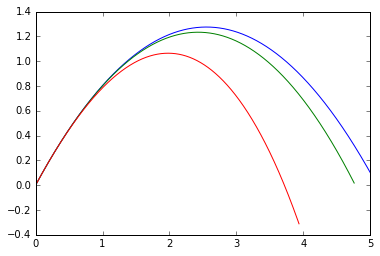

In [8]:
p = [0,0,5,5]
t,sol_id = rk4_a(e_mov,p,[0,1])
t,sol_fv = rk4_a(e_mov,p,[0,1],fric_v)
t,sol_fv2 = rk4_a(e_mov,p,[0,1],fric_v2)
plot(sol_id[:,0],sol_id[:,1])
plot(sol_fv[:,0],sol_fv[:,1])
plot(sol_fv2[:,0],sol_fv2[:,1])
show()

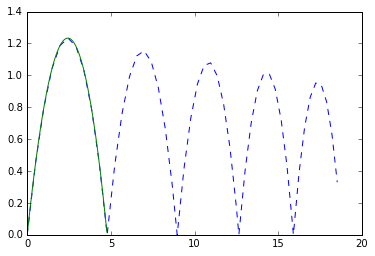

In [10]:
p = [0,0,5,5]
N = 50
trayectoria = zeros((N,len(p)))
mi_dt = .1
trayectoria[0,:] = array(p)
for i in range(N-1):
    t,sol_dt = rk4_a(e_mov,trayectoria[i,:],[0,mi_dt],fric_v)
    if sol_dt[-1,:][1] < 0:
        #print "buscando punto de rebote"
        dt_busqueda = mi_dt/2
        y_izq = trayectoria[i,:]
        t,sol = rk4_a(e_mov,trayectoria[i,:],[0,dt_busqueda],fric_v)
        y_med = sol[-1,:]
        while abs(y_izq[1]) > 1e-5:
            if y_izq[1]*y_med[1] < 0:
                reinicio = y_izq
            else:
                reinicio = y_med
            dt_busqueda = dt_busqueda/2
            t,sol = rk4_a(e_mov,reinicio,[0,dt_busqueda],fric_v)
            y_izq = reinicio
            y_med = sol[-1,:]
        y_izq = array([y_izq[0],y_izq[1],y_izq[2],-y_izq[3]])
        trayectoria[i+1,:] = y_izq    
    else:
        trayectoria[i+1,:] = sol_dt[-1,:]

plot(trayectoria[:,0],trayectoria[:,1],'--')
plot(sol_fv[:,0],sol_fv[:,1])

In [14]:
def rebote(r_v_i,mi_dt,):
    dt_busqueda = mi_dt/2
    y_izq = r_v_i
    t,sol = rk4_a(e_mov,r_v_i,[0,dt_busqueda],fric_v)
    y_med = sol[-1,:]
    while abs(y_izq[1]) > 1e-5:
        if y_izq[1]*y_med[1] < 0:
            reinicio = y_izq
        else:
            reinicio = y_med
        dt_busqueda = dt_busqueda/2
        t,sol = rk4_a(e_mov,reinicio,[0,dt_busqueda],fric_v)
        y_izq = reinicio
        y_med = sol[-1,:]
    y_izq = array([y_izq[0],y_izq[1],y_izq[2],-y_izq[3]])
    return y_izq

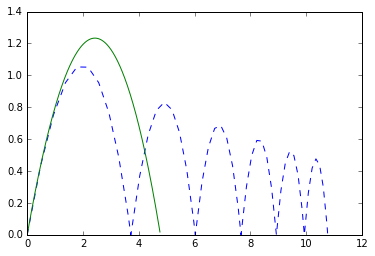

In [16]:
p = [0,0,5,5]
N = 50
trayectoria = zeros((N,len(p)))
mi_dt = .1
trayectoria[0,:] = array(p)
for i in range(N-1):
    t,sol_dt = rk4_a(e_mov,trayectoria[i,:],[0,mi_dt],fric_v2)
    if sol_dt[-1,:][1] < 0:
        punto = rebote(trayectoria[i,:],mi_dt)
        
        trayectoria[i+1,:] = punto    
    else:
        trayectoria[i+1,:] = sol_dt[-1,:]

plot(trayectoria[:,0],trayectoria[:,1],'--')
plot(sol_fv[:,0],sol_fv[:,1])